In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import file
df = pd.read_csv('all_df.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Columns: 103 entries, Unnamed: 0 to ('Spend', 'Referral')
dtypes: float64(70), int64(22), object(11)
memory usage: 289.0+ KB
None


**1. Can you count something interesting?**

In [38]:
import numpy as np

#Create a new column with 1 if they reached or exceeded goal and 0 if they did not
df['Goal Reached'] = np.where(df['Revenue'] >= df['Daily Revenue Demand Plan'], 1, 0)

print(df['Goal Reached'].head())

0    0
1    0
2    0
3    0
4    0
Name: Goal Reached, dtype: int32


In [48]:
#Count the number of days they reached or exceeded goal and the number of days they did not
gr_df = df['Goal Reached'].value_counts()
days_not_reached = float(gr_df[0])
days_reached = float(gr_df[1])
days = float(len(df))
per_not_reach = float(days_not_reached/days)
per_reach = float(days_reached/days)

print'Number of Days Goal Not Reached:',gr_df[0],"; Number of Days Goal Reached:", gr_df[1]
print'Percentage of Days Goal Not Reached:', per_not_reach
print'Percentage of Days Goal Reached:', per_reach

Number of Days Goal Not Reached: 240 ; Number of Days Goal Reached: 119
Percentage of Days Goal Not Reached: 0.66852367688
Percentage of Days Goal Reached: 0.33147632312


**2. Can you find some trends (high, low, increase, decrease, anomalies)?**

In [19]:
#Create columns for portions of the date (year, month, day, year-month)
def getMonth(s):
  return s.split("-")[1]

def getYear(s):
  return s.split("-")[0]

def getDay(s):
  return s.split("-")[2]

def getYearMonth(s):
  return s.split("-")[0]+"-"+s.split("-")[1]

df['year']= df['Date'].apply(lambda x: getYear(x))
df['month']= df['Date'].apply(lambda x: getMonth(x))
df['day']= df['Date'].apply(lambda x: getDay(x))
df['YearMonth']= df['Date'].apply(lambda x: getYearMonth(x))

print(df.head())

   Unnamed: 0        Date     Revenue   Users  Sessions  Transactions  \
0           0  2016-12-04  1221370.25  306549    379353          7667   
1           1  2016-12-05   704274.10  233431    281685          5025   
2           2  2016-12-06   619297.48  282736    345140          4597   
3           3  2016-12-07   636135.35  259674    321574          5004   
4           4  2016-12-08   777424.30  324932    404220          6542   

   Quantity  Bounces  Pages / Session Avg. Session Duration    ...      \
0     10094   119198             4.36               0:03:30    ...       
1      7252    95546             4.24               0:03:26    ...       
2      6169   139158             3.72               0:02:59    ...       
3      6776   121949             4.01               0:03:15    ...       
4      9046   173149             3.82               0:03:05    ...       

  ('Spend', 'PLA')  ('Spend', 'Paid Search')  ('Spend', 'Paid Social')  \
0         16325.69                  50246.

In [5]:
#Create a new dataframe with just the sum of revenue by device by Month/Year
df1 = df.groupby(df['YearMonth']).sum()
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2016-12 to 2017-11
Data columns (total 93 columns):
Unnamed: 0                                         12 non-null int64
Revenue                                            12 non-null float64
Users                                              12 non-null int64
Sessions                                           12 non-null int64
Transactions                                       12 non-null int64
Quantity                                           12 non-null int64
Bounces                                            12 non-null int64
Pages / Session                                    12 non-null float64
('Users', '(Other)')                               12 non-null float64
('Users', 'Affiliate')                             12 non-null float64
('Users', 'CSE')                                   12 non-null float64
('Users', 'Direct')                                12 non-null float64
('Users', 'Display')                               

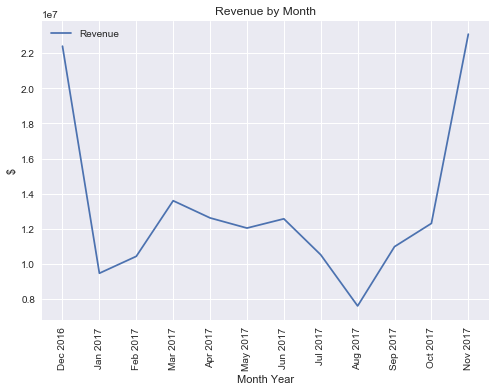

In [62]:
n_groups_df1 = len(df1)
index_df1 = np.arange(n_groups_df1)

revenue = df1[df1.columns[1]]
_ = plt.plot(index, revenue, label= 'Revenue')

plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Revenue by Month')
plt.xticks(index, ('Dec 2016', 'Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017'), rotation=90)
plt.legend()

plt.show()

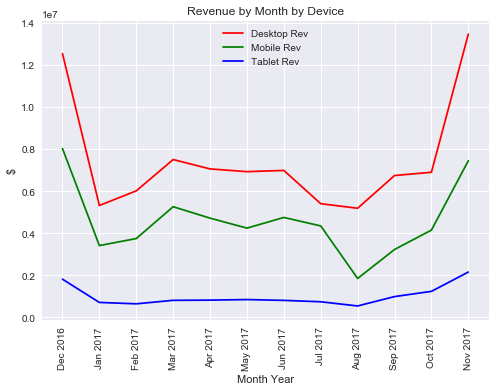

In [20]:
n_groups = len(df1)
index = np.arange(n_groups)

revenue_desktop = df1[df1.columns[50]]
revenue_mobile = df1[df1.columns[51]]
revenue_tablet = df1[df1.columns[52]]
_ = plt.plot(index, revenue_desktop, color='r', label= 'Desktop Rev')
_ = plt.plot(index, revenue_mobile, color='g', label='Mobile Rev')
_ = plt.plot(index, revenue_tablet, color='b', label='Tablet Rev')

plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Revenue by Month by Device')
plt.xticks(index, ('Dec 2016', 'Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017'), rotation=90)
plt.legend()

plt.show()

**3. Can you make a bar plot or a histogram?**

In [21]:
#Create a new dataframe with just the sum of revenue and sum of plan by Month/Year
df2 = df.groupby(df['YearMonth'])['Revenue','Daily Revenue Demand Plan'].sum()
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2016-12 to 2017-11
Data columns (total 2 columns):
Revenue                      12 non-null float64
Daily Revenue Demand Plan    12 non-null float64
dtypes: float64(2)
memory usage: 288.0+ bytes
None


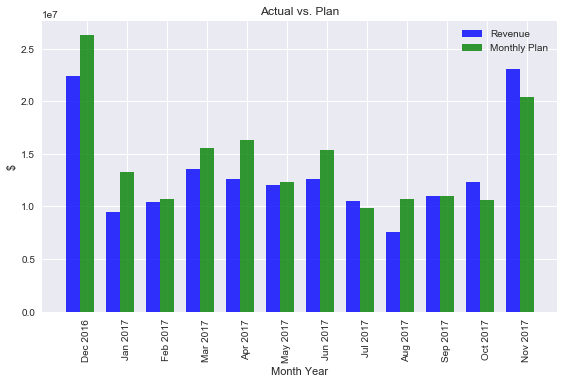

In [22]:
#Side by side bar chart to compare revenue to plan

# data to plot
n_groups = len(df2)
revenue = df2['Revenue']
monthly_plan = df2['Daily Revenue Demand Plan']
 
#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, revenue, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Revenue')
 
rects2 = plt.bar(index + bar_width, monthly_plan, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Monthly Plan')
 
plt.xlabel('Month Year')
plt.ylabel('$')
plt.title('Actual vs. Plan')
plt.xticks(index + bar_width, ('Dec 2016', 'Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017'), rotation=90)
plt.legend()
 
plt.tight_layout()
plt.show()


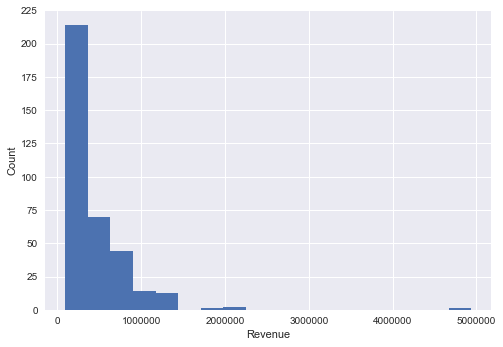

In [50]:
#Calculate the number of bins.

n_data = len(df['Revenue'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(df['Revenue'], bins= n_bins)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count')

plt.show()

**4. Can you compare two related quantities?**

0      -608629.75
1      -111316.90
2      -125445.52
3      -300361.65
4      -338485.70
5      -158320.95
6       -54147.45
7       -37202.05
8      -125649.50
9      -346335.70
10     -753845.40
11     -251555.19
12      -15574.35
13      120547.40
14      278707.00
15      141323.35
16      149961.90
17      -59090.48
18       50574.12
19      -52956.05
20      -52031.75
21      -66781.09
22     -402798.10
23     -213822.30
24     -283083.10
25      -24784.00
26      -60203.07
27     -239789.35
28     -195914.50
29     -229026.40
          ...    
329      80439.94
330      17349.80
331     -36451.37
332     -15457.10
333    -249682.55
334    -157410.83
335    -150095.05
336    -211128.06
337     -76748.94
338     -21837.01
339     -18371.28
340     334760.15
341     254521.53
342     241653.43
343     266040.13
344      16977.28
345     -78379.65
346     -10315.75
347     -97574.69
348     244794.01
349       5229.65
350      -1313.33
351    -126754.33
352      66302.05
353     12

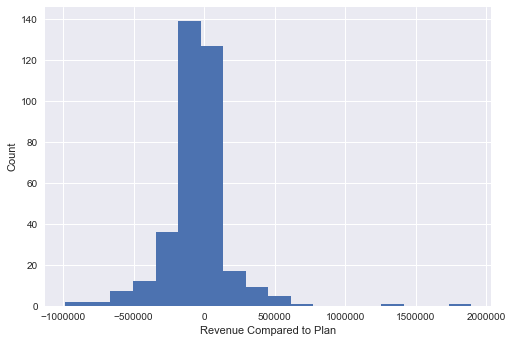

In [33]:
df['Rev Compared to Plan'] = df['Revenue'] - df['Daily Revenue Demand Plan']
print(df['Rev Compared to Plan'])

#Create a histogram to visualize the dataset
sns.set()
_ = plt.hist(df['Rev Compared to Plan'], bins= n_bins)
_ = plt.xlabel('Revenue Compared to Plan')
_ = plt.ylabel('Count')

plt.show()

**5. Can you make a scatterplot?**

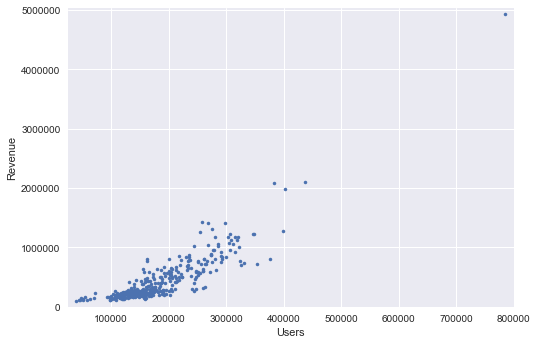

In [23]:
#Create a scatterplot to look at the correlation between unique web traffic and revenue
_ = plt.plot(df['Users'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')

plt.show()

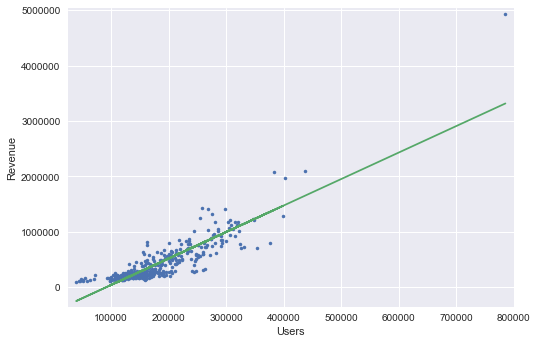

In [56]:
#Create a scatterplot to look at the correlation between unique web traffic and revenue
m, b = np.polyfit(df['Users'], df['Revenue'], 1)

_ = plt.plot(df['Users'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Users'], m*df['Users'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Users')
_ = plt.ylabel('Revenue')

plt.show()

**6. Can you make a time-series plot?**

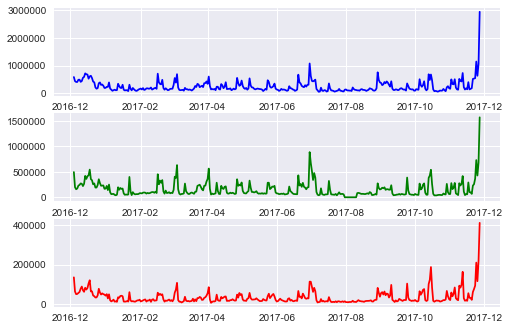

In [26]:
#Create three separate graphs, one for each device over time

x = pd.to_datetime(df['Date'], format='%Y-%m-%d')
revenue_desktop = df[df.columns[53]]
revenue_mobile = df[df.columns[54]]
revenue_tablet = df[df.columns[55]]

_ = plt.subplot(3, 1, 1)
_ = plt.plot(x, revenue_desktop, color='b', label = 'Desktop Revenue')
_ = plt.subplot(3, 1, 2)
_ = plt.plot(x, revenue_mobile, color='g', label = 'Mobile Revenue')
_ = plt.subplot(3, 1, 3)
_ = plt.plot(x, revenue_tablet, color='r', label = 'Tablet Revenue')

plt.show()



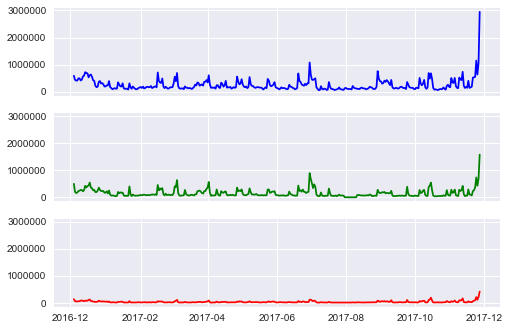

In [55]:
#Create, but have the same x, y axis for all three to illustrate the differences more easily.
x = pd.to_datetime(df['Date'], format='%Y-%m-%d')
revenue_desktop = df[df.columns[53]]
revenue_mobile = df[df.columns[54]]
revenue_tablet = df[df.columns[55]]

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, revenue_desktop, color='b', label = 'Desktop Revenue')
ax2.plot(x, revenue_mobile, color='g', label = 'Mobile Revenue')
ax3.plot(x, revenue_tablet, color='r', label = 'Tablet Revenue')

plt.show()


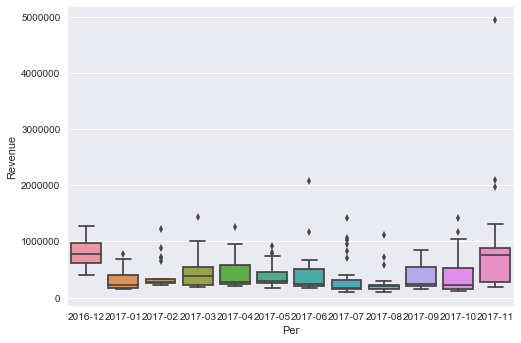

In [14]:
#Create a boxplot by month/year
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Per'] = pd.DatetimeIndex(df['Date']).to_period('M')

sns.boxplot(x='Per', y='Revenue', data=df)
#sns.swarmplot(x='Per', y='Revenue', data=df, color="0.25")
plt.show()

**Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis that you'd like to investigate further? What other questions do they lead you to ask?**

* Two-thirds of the days the client has not met their revenue plan. 
* August 2017 was the lowest revenue month.
* Every month, the device that drove the most revenue was desktop, with mobile second and tablet a distant third.
* October 2017 and November 2017 are the only two months out of the year that they client has exceeded the monthly plan (the sum of the daily plans for the month). Note: This client utilizes a fiscal calendar however, which was not used for these monthly sums.
* The histogram illustrates that just over nearly all of the 359 data points have revenue under $1,000,000
* In both the histogram and the scatter plot it's easy to see that there appears to be an outlier. When you identify the date of this datapoint you discover that this is Black Friday which for retailers like this client is typically an outlier and the highest revenue day of the year.
* Desktop and mobile revenue appear to follow a similar pattern, even though mobile is below desktop. Tablet however, doesn't appear to have the same high peaks that the other two do.
* The boxplot heps to highlight that December 2016, November 2017 are the two strong months out of the year with the mean for both those months much higher than any other month. March also appears to have a higher mean revenue than any other month.
* The scatterplot does indicate a strong positive correlation between Users (web traffic) and revenue. The more Users on site, the higher revenue should be.


*Theories that I'd like to explore further:*

* The impact of various promotions to the revenue.
* The impact of their advertising spend to the revenue.


*Other questions that these charts lead me to ask:*

* What channels were driving traffic and revenue.
* Why were come days more likely to see higher revenue (see note above about promotions and spend).
* What would make the biggest impact if we are not likely to reach plan?



